In [4]:
import numpy as np 
import pandas as pd 
import calendar


import seaborn as sns
import matplotlib.pyplot as plt   
from matplotlib.pyplot import pie
from matplotlib import gridspec
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')

In [5]:
CSV = 'https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Data/ETH-USD.csv'

df = pd.read_csv(CSV)
df = df.drop(columns=['Adj Close']) 
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month_Num'] = df['Date'].dt.month
df['Month'] = df['Month_Num'].apply(lambda x: calendar.month_abbr[x])

df['YYYYMM'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m')

df['Close_log'] = np.log(df['Close'])

df['Return'] = df['Close'] / df['Open'][0] -1

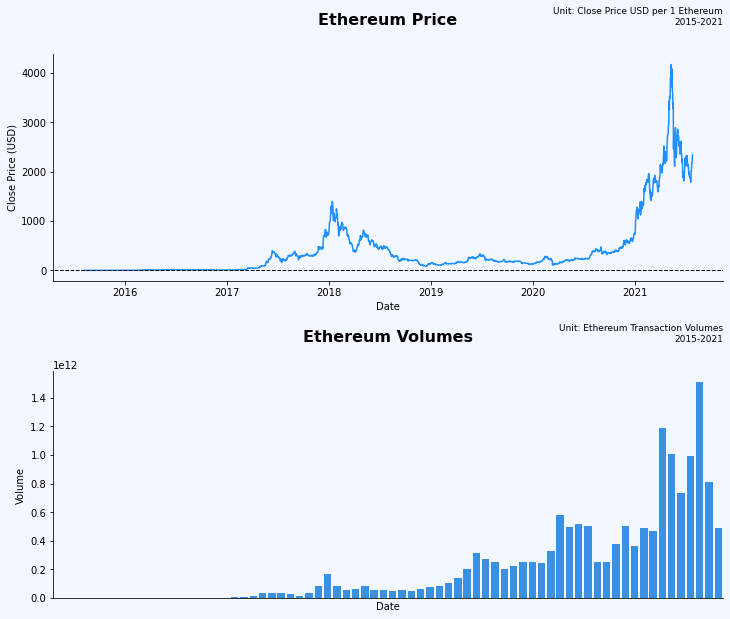

In [6]:
df_hm = pd.pivot_table(df, values="Volume", index=['Year', 'Month_Num'], aggfunc=np.sum)
df_hm.reset_index(level=0, inplace=True)
df_hm.reset_index(level=0, inplace=True)
df_hm['Date'] = pd.to_datetime((df_hm.Year*100+df_hm.Month_Num).apply(str),format='%Y%m').dt.strftime('%Y%m')
df_hm['Volume_log'] = np.log(df_hm['Volume'])

fig = plt.figure(figsize=(12,10))

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

fig.patch.set_facecolor('#F3F7FF')
fig.patch.set_alpha(1.0)

ax1 = plt.subplot(2,1,1)
ax1 = sns.lineplot(data=df, x="Date", y="Close", color="dodgerblue")

ax1.patch.set_facecolor('#F3F7FF')
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

ax1 = plt.ylabel("Close Price (USD)")

ax1 = plt.axhline(0, 8, 0, color='black', linestyle='--', linewidth='1')



ax1 = plt.title('Unit: Close Price USD per 1 Ethereum\n2015-2021', fontsize = 9, loc='right')
ax1 = plt.title('Ethereum Price',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); 
ax2 = plt.subplot(2,1,2)
ax2 = sns.barplot(x="Date", y="Volume", data=df_hm, color="dodgerblue")

ax2.patch.set_facecolor('#F3F7FF')
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)
ax2 = plt.xticks([])

ax2 = plt.title('Unit: Ethereum Transaction Volumes\n2015-2021', fontsize = 9, loc='right')
ax2 = plt.title('Ethereum Volumes',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); 

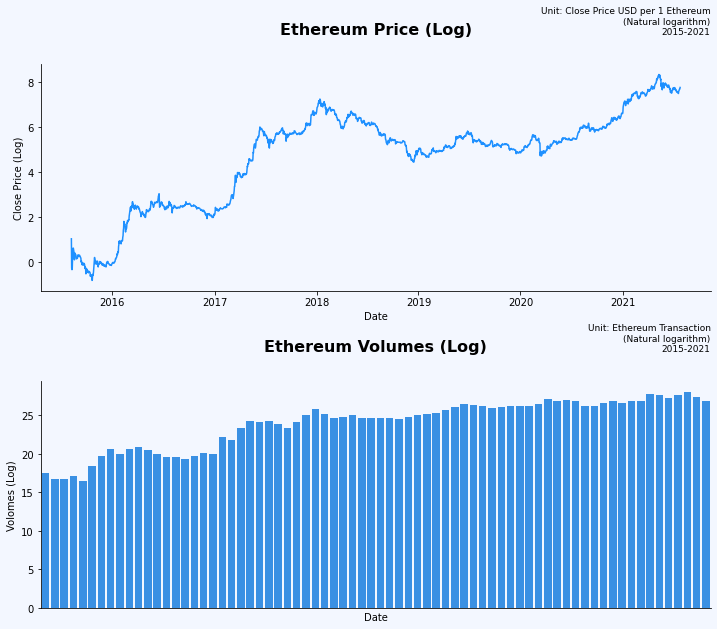

In [7]:
fig = plt.figure(figsize=(12,10))

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

fig.patch.set_facecolor('#F3F7FF')
fig.patch.set_alpha(1.0)


ax1 = plt.subplot(2,1,1)
ax1 = sns.lineplot(data=df, x="Date", y="Close_log", color="dodgerblue")
ax1.patch.set_facecolor('#F3F7FF')
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

ax1 = plt.ylabel("Close Price (Log)")

ax1 = plt.title('Unit: Close Price USD per 1 Ethereum\n(Natural logarithm)\n2015-2021', fontsize = 9, loc='right')
ax1 = plt.title('Ethereum Price (Log)',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); 
ax2 = plt.subplot(2,1,2)
ax2 = sns.barplot(x="Date", y="Volume_log", data=df_hm, color="dodgerblue")
ax2.patch.set_facecolor('#F3F7FF')
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)
ax2 = plt.xticks([])

ax2 = plt.ylabel("Volomes (Log)")

ax2 = plt.title('Unit: Ethereum Transaction\n(Natural logarithm)\n2015-2021', fontsize = 9, loc='right')
ax2 = plt.title('Ethereum Volumes (Log)',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); 